# Introduction to Portfolio Theory: Moving Averages and Technical Analysis #

In [170]:
# Import Libraries

# Data Management
import pandas as pd
import numpy as np

# Technical Analysis
import ta

# Visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Pretty Notation
from IPython.display import display, Math

In [112]:
def import_financial_data(
    ticker: str
):

    # Check the ticker for Upper Cases
    ticker = ticker if ticker.isupper() else ticker.upper()

    # Import data
    df = pd.read_csv(rf"..\stocks\{ticker}.csv")

    # Set the Index
    df = df.set_index('Date')
    df.index = pd.to_datetime(df.index)

    df_useful_data = df[['Open Price', 'High Price', 'Low Price', 'Close Price', 'Volume']]

    df_useful_data = df_useful_data.rename(columns={
        "Open Price":"Open",
        "High Price":"High",
        "Low Price":"Low",
        "Close Price":"Close",
    })

    # Drop NaN's
    df_useful_data.dropna(inplace = True)

    return df_useful_data.loc["2020-01-01":]


In [113]:
# Amazon Data
df_amzn = import_financial_data("AMZN")

df_amzn

Open      High       Low     Close      Volume
Date                                                          
2020-01-02   93.7500   94.9005   93.2120   94.9005  15215839.0
2020-01-03   93.2505   94.3005   93.2500   93.7485  15702599.0
2020-01-06   93.0000   95.1665   93.0000   95.1440  15724139.0
2020-01-07   95.2250   95.6875   94.6245   95.3430  21132339.0
2020-01-08   94.9020   95.5355   94.3430   94.5985  14918919.0
...              ...       ...       ...       ...         ...
2024-10-15  187.5400  188.4100  184.5900  187.6900   9804437.0
2024-10-16  187.0600  187.7700  185.6150  186.8900   9654994.0
2024-10-17  188.1900  188.9400  186.0000  187.5300   6480613.0
2024-10-18  187.1100  190.7400  186.3000  188.9900   9893488.0
2024-10-21  188.0000  189.4600  186.4000  189.0700   7163532.0

[1209 rows x 5 columns]

In [114]:
# Candle Sticks

# Create the Candle Stick Plot
fig = go.Figure(data=[go.Candlestick(
    x=df_amzn.index,
    open=df_amzn['Open'],
    high=df_amzn['High'],
    low=df_amzn['Low'],
    close=df_amzn['Close'],
    name='Candles'
)])

# Config for the Layout
fig.update_layout(
    title='AMZN Prices',
    xaxis_rangeslider_visible=True,
    height=800,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

# X Axis Legend
fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
)

# Y Axis Legend
fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
)

# Show
fig.show()


In [115]:
# Simple Moving Averages

display(Math(r"SMA_{t,n}=\frac{1}{n}\sum_{i=0}^{n-1}{x_{t-i}}"))

<IPython.core.display.Math object>

In [116]:
# Simple Moving Averages

df_amzn['SMA_21'] = df_amzn['Close'].rolling(window=21).mean()
df_amzn['SMA_63'] = df_amzn['Close'].rolling(window=63).mean()
df_amzn['SMA_252'] = df_amzn['Close'].rolling(window=252).mean()

# Crear gráfico de velas con Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_amzn.index,
    open=df_amzn['Open'],
    high=df_amzn['High'],
    low=df_amzn['Low'],
    close=df_amzn['Close'],
    name='Candles'
)])

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['SMA_21'],
                mode='lines',
                name='SMA 21',
                line=dict(
                    color='#3b83bd',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['SMA_63'],
                mode='lines',
                name='SMA 63',
                line=dict(
                    color='#003955',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['SMA_252'],
                mode='lines',
                name='SMA 252',
                line=dict(
                    color='#ffaa00',
                    # width = 4
                )
            )
        )

fig.update_layout(
    title='AMZN Prices and SMAs',
    xaxis_rangeslider_visible=False,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
)

fig.show()

In [117]:
# Weighted Moving Averages with Linear Weights

display(Math(r"WMA_{t,n}=\frac{\sum_{i=0}^{n-1}{(n-i)x_{t-i}}}{\sum_{i=0}^{n-1}{w_{i}}}"))

<IPython.core.display.Math object>

In [118]:
# Weighted Moving Averages
def weighted_moving_average(data, window_size):

    # Linear Weights
    weights = np.arange(1, window_size + 1)
    
    return data.rolling(window=window_size).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)


In [119]:
# Weighted Moving Averages

df_amzn['WMA_21'] = weighted_moving_average(pd.Series(df_amzn['Close']), 21)
df_amzn['WMA_63'] = weighted_moving_average(pd.Series(df_amzn['Close']), 63)
df_amzn['WMA_252'] = weighted_moving_average(pd.Series(df_amzn['Close']), 252)

# Crear gráfico de velas con Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_amzn.index,
    open=df_amzn['Open'],
    high=df_amzn['High'],
    low=df_amzn['Low'],
    close=df_amzn['Close'],
    name='Candles'
)])

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['WMA_21'],
                mode='lines',
                name='WMA 21',
                line=dict(
                    color='#3b83bd',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['WMA_63'],
                mode='lines',
                name='WMA 63',
                line=dict(
                    color='#003955',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['WMA_252'],
                mode='lines',
                name='WMA 252',
                line=dict(
                    color='#ffaa00',
                    # width = 4
                )
            )
        )

fig.update_layout(
    title='AMZN Prices and WMAs',
    xaxis_rangeslider_visible=False,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
)

fig.show()

In [120]:
# Geometric Moving Averages

display(Math(r"GMA_{t,n}=\left(\prod_{i=0}^{n-1}x_{t-i}\right)^{\frac{1}{n}}"))
display(Math(r"\ln\left(GMA_{t,n}\right)=\sum_{i=0}^{n-1}{\ln{x_{t-i}}}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [121]:
# Geometric Moving Averages
def geometric_moving_average(series, window_size):

    # Set the log series
    log_series = np.log(series)

    # Set a rolling SMA of the log series
    rolling_log_mean = log_series.rolling(window=window_size).mean()

    # Then obtain the exponential
    gma = np.exp(rolling_log_mean)
    
    return gma

In [122]:
# Geometric Moving Averages

df_amzn['GMA_21'] = geometric_moving_average(pd.Series(df_amzn['Close']), 21)
df_amzn['GMA_63'] = geometric_moving_average(pd.Series(df_amzn['Close']), 63)
df_amzn['GMA_252'] = geometric_moving_average(pd.Series(df_amzn['Close']), 252)

# Crear gráfico de velas con Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_amzn.index,
    open=df_amzn['Open'],
    high=df_amzn['High'],
    low=df_amzn['Low'],
    close=df_amzn['Close'],
    name='Candles'
)])

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['GMA_21'],
                mode='lines',
                name='GMA 21',
                line=dict(
                    color='#3b83bd',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['GMA_63'],
                mode='lines',
                name='GMA 63',
                line=dict(
                    color='#003955',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['GMA_252'],
                mode='lines',
                name='GMA 252',
                line=dict(
                    color='#ffaa00',
                    # width = 4
                )
            )
        )

fig.update_layout(
    title='AMZN Prices and GMAs',
    xaxis_rangeslider_visible=False,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
)

fig.show()

In [123]:
# Exponential Moving Averages

display(Math(r"EMA_{t,n}=\alpha x_t + \left(1-\alpha\right)EMA_{t-1,n}"))
display(Math(r"EMA_0=x_0"))
display(Math(r"\alpha=\frac{2}{n+1}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

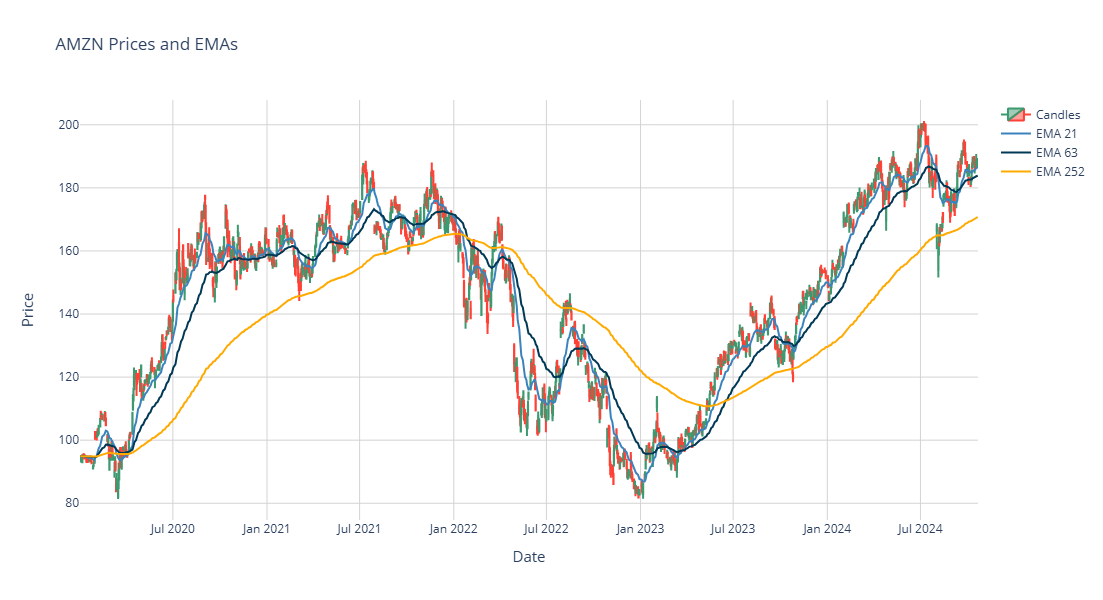

In [124]:
# Geometric Moving Averages

df_amzn['EMA_21'] = df_amzn['Close'].ewm(span=21, adjust=False).mean()
df_amzn['EMA_63'] = df_amzn['Close'].ewm(span=63, adjust=False).mean()
df_amzn['EMA_252'] = df_amzn['Close'].ewm(span=252, adjust=False).mean()

# Crear gráfico de velas con Plotly
fig = go.Figure(data=[go.Candlestick(
    x=df_amzn.index,
    open=df_amzn['Open'],
    high=df_amzn['High'],
    low=df_amzn['Low'],
    close=df_amzn['Close'],
    name='Candles'
)])

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['EMA_21'],
                mode='lines',
                name='EMA 21',
                line=dict(
                    color='#3b83bd',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['EMA_63'],
                mode='lines',
                name='EMA 63',
                line=dict(
                    color='#003955',
                    # width = 4
                )
            )
        )

fig.add_trace(
            go.Scatter(
                x=df_amzn.index,
                y=df_amzn['EMA_252'],
                mode='lines',
                name='EMA 252',
                line=dict(
                    color='#ffaa00',
                    # width = 4
                )
            )
        )

fig.update_layout(
    title='AMZN Prices and EMAs',
    xaxis_rangeslider_visible=False,
    height=600,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
)

fig.show()

In [125]:
# Technical Analysis Stats: Relative Strength Index

display(Math(r"RSI_t=100-\frac{100}{1+RS_t}"))
display(Math(r"RS_t=\frac{EMA_{t,n=14}\left(G_t\right)}{EMA_{t,n=14}\left(L_t\right)}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [164]:
def RSI(series):

    change = series.diff(1)
    gains = pd.Series(np.where(change > 0, change, 0), index=series.index)
    loses = pd.Series(np.where(change < 0, -change, 0), index=series.index)

    # Medias exponenciales suavizadas de ganancias y pérdidas
    ema_gains = gains.ewm(com = 13, min_periods = 14).mean()
    ema_loses = loses.ewm(com = 13, min_periods = 14).mean()

    # Cálculo del RSI
    rs = ema_gains / ema_loses
    rsi = 100 - (100 / (1 + rs))

    return rsi

In [166]:
# Plot the Technical Analysis Chart

df_amzn['RSI'] = RSI(df_amzn['Close'])

fig = make_subplots(
            rows=3,
            cols=1,
            shared_xaxes=True,
            vertical_spacing=0.015,
            row_heights=[0.5, 0.2, 0.3],
            shared_yaxes=True
        )

fig.add_trace(
    go.Candlestick(
        x=df_amzn.index,
        open=df_amzn['Open'],
        high=df_amzn['High'],
        low=df_amzn['Low'],
        close=df_amzn['Close'],
        name='Candles'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_21'],
        mode='lines',
        name='EMA 21',
        line=dict(
            color='#003955',
            # width = 4
        )
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_63'],
        mode='lines',
        name='EMA 63'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_252'],
        name='EMA 252',
        line=dict(
            color='#ffaa00',
            # width = 4
        )
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=df_amzn.index,
        y=df_amzn['Volume'],
        marker=dict(
            color="#000000"
        ),
        name='Volume',
        showlegend=False,
    ),
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['RSI'],
        name='RSI',
        line=dict(
            color='#0068c9',
            # width = 4
        )
    ),
    row=3,
    col=1
)

fig.add_hline(
    y=30,
    line=dict(
        color="#ff2b2b",
        width=2
    ),
    row=3,
    col=1
)

fig.add_hline(
    y=70,
    line=dict(
        color="#29b09d",
        width=2
    ),
    row=3,
    col=1
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
    row=3,
    col=1
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
    row=1,
    col=1
)

fig.update_yaxes(
    title_text="Volume",
    title_font=dict(size=15),
    row=2,
    col=1
)

fig.update_yaxes(
    title_text="RSI",
    title_font=dict(size=15),
    row=3,
    col=1
)

fig.update_layout(
    title='AMZN Technical Analysis',
    xaxis_rangeslider_visible=False,
    height=1000,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

In [168]:
# Ta Library also can calculate it easier
df_amzn['RSI_TA'] = ta.momentum.rsi(df_amzn['Close'], window=14)

df_amzn[['RSI', 'RSI_TA']].dropna()

RSI     RSI_TA
Date                            
2020-01-02        NaN        NaN
2020-01-03        NaN        NaN
2020-01-06        NaN        NaN
2020-01-07        NaN        NaN
2020-01-08        NaN        NaN
...               ...        ...
2024-10-15  54.451332  54.451332
2024-10-16  52.964141  52.964141
2024-10-17  54.045478  54.045478
2024-10-18  56.502205  56.502205
2024-10-21  56.638994  56.638994

[1209 rows x 2 columns]

In [180]:
# Technical Analysis Stats: Moving Average Convergence Divergence

display(Math(r"MACD_t=EMA_{t,n=12}\left(P_t\right)-EMA_{t,n=26}\left(P_t\right)"))
display(Math(r"Signal_t=EMA_{t,n=9}\left(MACD_t\right)"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [184]:
# Moving Average Convergence Divergence

def MACD(series):

    ema_12 = series.ewm(span=12, adjust=False).mean()
    ema_26 = series.ewm(span=26, adjust=False).mean()

    return ema_12 - ema_26

def Signal(MACD):

    return MACD.ewm(span=9, adjust=False).mean()

In [192]:
# Calculate the MACD

df_amzn['MACD'] = MACD(df_amzn['Close'])
df_amzn['Signal'] = Signal(df_amzn['MACD'])
df_amzn['Histogram'] = df_amzn['MACD'] - df_amzn['Signal']

fig = make_subplots(
            rows=4,
            cols=1,
            shared_xaxes=True,
            vertical_spacing=0.015,
            row_heights=[0.5, 0.2, 0.15, 0.15],
            shared_yaxes=True
        )

fig.add_trace(
    go.Candlestick(
        x=df_amzn.index,
        open=df_amzn['Open'],
        high=df_amzn['High'],
        low=df_amzn['Low'],
        close=df_amzn['Close'],
        name='Candles'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_21'],
        mode='lines',
        name='EMA 21',
        line=dict(
            color='#003955',
            # width = 4
        )
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_63'],
        mode='lines',
        name='EMA 63'
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['EMA_252'],
        name='EMA 252',
        line=dict(
            color='#ffaa00',
            # width = 4
        )
    ),
    row=1,
    col=1
)

fig.add_trace(
    go.Bar(
        x=df_amzn.index,
        y=df_amzn['Volume'],
        marker=dict(
            color="#000000"
        ),
        name='Volume',
        showlegend=False,
    ),
    row=2,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['RSI'],
        name='RSI',
        line=dict(
            color='#0068c9',
            # width = 4
        )
    ),
    row=3,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['MACD'],
        name='',
        line=dict(
            color='#0068c9',
            # width = 4
        ),
        showlegend=False
    ),
    row=4,
    col=1
)

fig.add_trace(
    go.Scatter(
        x=df_amzn.index,
        y=df_amzn['Signal'],
        name='',
        line=dict(
            color='#ff8700',
            # width = 4
        ),
        showlegend=False
    ),
    row=4,
    col=1
)

fig.add_trace(
    go.Bar(
        x=df_amzn.index,
        y=df_amzn['Histogram'],
        marker=dict(
            color=['green' if x > 0 else 'red' for x in df_amzn['Histogram']]
        ),
        name='',
        showlegend=False
    ),
    row=4,
    col=1
)

fig.add_hline(
    y=30,
    line=dict(
        color="#ff2b2b",
        width=2
    ),
    row=3,
    col=1
)

fig.add_hline(
    y=70,
    line=dict(
        color="#29b09d",
        width=2
    ),
    row=3,
    col=1
)

fig.update_xaxes(
    title_text="Date",
    title_font=dict(size=15),
    row=4,
    col=1
)

fig.update_yaxes(
    title_text="Price",
    title_font=dict(size=15),
    row=1,
    col=1
)

fig.update_yaxes(
    title_text="Volume",
    title_font=dict(size=15),
    row=2,
    col=1
)

fig.update_yaxes(
    title_text="RSI",
    title_font=dict(size=15),
    row=3,
    col=1
)

fig.update_yaxes(
    title_text="MACD",
    title_font=dict(size=15),
    row=4,
    col=1
)

fig.update_layout(
    title='AMZN Technical Analysis',
    xaxis_rangeslider_visible=False,
    height=1000,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray') 
)

# Show
fig.show()